# Importing Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
nhl = pd.read_csv('NHL_2018_2019_clean.csv')

In [3]:
nhl.head(20)

,Division,Home Team,Game Date,where,Opponent,Team,Opp.,Result,Other,W-L-OT,Streak,Pct†
0,Atlantic,Tampa Bay,10/6/18,vs.,Florida,2,1,Win,SO,1-0-0,W1,0.600
1,Atlantic,Tampa Bay,10/11/18,vs.,Vancouver,1,4,Loss,NaN,1/1/00,L1,0.300
2,Atlantic,Tampa Bay,10/13/18,vs.,Columbus,8,2,Win,NaN,2/1/00,W1,0.533
3,Atlantic,Tampa Bay,10/16/18,vs.,Carolina,4,2,Win,NaN,3/1/00,W2,0.650
4,Atlantic,Tampa Bay,10/18/18,vs.,Detroit,3,1,Win,NaN,4/1/00,W3,0.720
5,Atlantic,Tampa Bay,10/20/18,at,Minnesota,4,5,OTL,OT,4/1/01,L1,0.633
6,Atlantic,Tampa Bay,10/21/18,at,Chicago,6,3,Win,NaN,5/1/01,W1,0.686
7,Atlantic,Tampa Bay,10/24/18,at,Colorado,1,0,Win,NaN,6/1/01,W2,0.725
8,Atlantic,Tampa Bay,10/26/18,at,Vegas,3,2,Win,NaN,7/1/01,W3,0.756
9,Atlantic,Tampa Bay,10/27/18,at,Arizona,1,7,Loss,NaN,7/2/01,L1,0.680


# Viewing Data Info

In [5]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Division   2542 non-null   object 
 1   Home Team  2542 non-null   object 
 2   Game Date  2542 non-null   object 
 3   where      2542 non-null   object 
 4   Opponent   2542 non-null   object 
 5   Team       2542 non-null   int64  
 6   Opp.       2542 non-null   int64  
 7   Result     2542 non-null   object 
 8   Other      542 non-null    object 
 9   W-L-OT     2542 non-null   object 
 10  Streak     2542 non-null   object 
 11  Pct†       2542 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 238.4+ KB


### Creating a Date in Datetime Format

In [6]:
nhl['Date_Time'] = pd.to_datetime(nhl['Game Date'], format="%m/%d/%y")

In [7]:
nhl.head()

,Division,Home Team,Game Date,where,Opponent,Team,Opp.,Result,Other,W-L-OT,Streak,Pct†,Date_Time
0,Atlantic,Tampa Bay,10/6/18,vs.,Florida,2,1,Win,SO,1-0-0,W1,0.600,2018-10-06
1,Atlantic,Tampa Bay,10/11/18,vs.,Vancouver,1,4,Loss,NaN,1/1/00,L1,0.300,2018-10-11
2,Atlantic,Tampa Bay,10/13/18,vs.,Columbus,8,2,Win,NaN,2/1/00,W1,0.533,2018-10-13
3,Atlantic,Tampa Bay,10/16/18,vs.,Carolina,4,2,Win,NaN,3/1/00,W2,0.650,2018-10-16
4,Atlantic,Tampa Bay,10/18/18,vs.,Detroit,3,1,Win,NaN,4/1/00,W3,0.720,2018-10-18


### Limiting the Data to Only Games Occuring after Nov. 20, 2018

In [9]:
nhl_limit = nhl[nhl['Date_Time'] > '2018-11-20']

In [10]:
nhl_limit.reset_index(inplace=True)

In [11]:
nhl_limit.columns

Index(['index', 'Division', 'Home Team', 'Game Date', 'where', 'Opponent',
       'Team', 'Opp.', 'Result', 'Other', 'W-L-OT', 'Streak', 'Pct†',
       'Date_Time'],
      dtype='object')

In [12]:
nhl_limit.drop('index', axis=1, inplace=True)

/Users/lucyallen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
nhl_limit.tail(65)

,Division,Home Team,Game Date,where,Opponent,Team,Opp.,Result,Other,W-L-OT,Streak,Pct†,Date_Time
1843,Pacific,Edmonton,4/2/19,at,Colorado,2,6,Loss,NaN,34-37-9,L4,0.420,2019-04-02
1844,Pacific,Edmonton,4/4/19,vs.,San Jose,2,3,Loss,NaN,34-38-9,L5,0.415,2019-04-04
1845,Pacific,Edmonton,4/6/19,at,Calgary,3,1,Win,NaN,35-38-9,W1,0.422,2019-04-06
1846,Pacific,Los Angeles,11/21/18,vs.,Colorado,3,7,Loss,NaN,7/13/01,L1,0.324,2018-11-21
1847,Pacific,Los Angeles,11/24/18,vs.,Vancouver,2,4,Loss,NaN,7/14/01,L2,0.309,2018-11-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,Pacific,Los Angeles,3/30/19,vs.,Chicago,3,2,Win,OT,29-40-9,W1,0.374,2019-03-30
1904,Pacific,Los Angeles,4/1/19,vs.,Calgary,2,7,Loss,NaN,29-41-9,L1,0.370,2019-04-01
1905,Pacific,Los Angeles,4/2/19,at,Arizona,3,1,Win,NaN,30-41-9,W1,0.378,2019-04-02
1906,Pacific,Los Angeles,4/5/19,at,Anaheim,2,5,Loss,NaN,30-42-9,L1,0.373,2019-04-05


### Adding Win, Loss, and Tie Columns from the W-L-OT column

In [17]:
nhl_limit['Wins'] = 0
nhl_limit['Loss'] = 0
nhl_limit['Ties'] = 0

for i in range(1908):
    if '-' in nhl_limit['W-L-OT'][i]:
        nhl_limit['Wins'][i] = nhl_limit['W-L-OT'][i].split('-')[0]
        nhl_limit['Loss'][i] = nhl_limit['W-L-OT'][i].split('-')[1]
        nhl_limit['Ties'][i] = nhl_limit['W-L-OT'][i].split('-')[2]
    else:
        nhl_limit['Wins'][i] = nhl_limit['W-L-OT'][i].split('/')[0]
        nhl_limit['Loss'][i] = nhl_limit['W-L-OT'][i].split('/')[1]
        nhl_limit['Ties'][i] = nhl_limit['W-L-OT'][i].split('/')[2]

<ipython-input-17-438ea0605c09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_limit['Wins'] = 0
<ipython-input-17-438ea0605c09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_limit['Loss'] = 0
<ipython-input-17-438ea0605c09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [18]:
nhl_limit.tail(50)

,Division,Home Team,Game Date,where,Opponent,Team,Opp.,Result,Other,W-L-OT,Streak,Pct†,Date_Time,Wins,Loss,Ties
1858,Pacific,Los Angeles,12/13/18,at,Columbus,1,4,Loss,NaN,11/20/02,L3,0.327,2018-12-13,11,20,2
1859,Pacific,Los Angeles,12/15/18,at,Pittsburgh,3,4,OTL,OT,11/20/03,L4,0.324,2018-12-15,11,20,3
1860,Pacific,Los Angeles,12/18/18,vs.,Winnipeg,4,1,Win,NaN,12/20/03,W1,0.343,2018-12-18,12,20,3
1861,Pacific,Los Angeles,12/22/18,at,San Jose,3,2,Win,OT,13-20-3,W2,0.356,2018-12-22,13,20,3
1862,Pacific,Los Angeles,12/23/18,at,Vegas,4,3,Win,OT,14-20-3,W3,0.368,2018-12-23,14,20,3
1863,Pacific,Los Angeles,12/27/18,vs.,Arizona,2,1,Win,NaN,15-20-3,W4,0.384,2018-12-27,15,20,3
1864,Pacific,Los Angeles,12/29/18,vs.,Vegas,1,4,Loss,NaN,15-21-3,L1,0.374,2018-12-29,15,21,3
1865,Pacific,Los Angeles,12/31/18,at,Colorado,3,2,Win,OT,16-21-3,W1,0.385,2018-12-31,16,21,3
1866,Pacific,Los Angeles,1/1/19,at,Vegas,0,2,Loss,NaN,16-22-3,L1,0.376,2019-01-01,16,22,3
1867,Pacific,Los Angeles,1/3/19,vs.,Tampa Bay,2,6,Loss,NaN,16-23-3,L2,0.367,2019-01-03,16,23,3


### Creating a totalpoints column for the games

In [19]:
nhl_limit['totalpoints'] = nhl_limit['Team'] + nhl_limit['Opp.']

<ipython-input-19-845b6679a71c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_limit['totalpoints'] = nhl_limit['Team'] + nhl_limit['Opp.']


In [20]:
nhl_limit.to_csv('NHL_clean_full.csv')

### Creating a copy of the data to add more columns

In [22]:
nhl_limit_new = nhl_limit.copy()

###### Adding Columns for the win, loss and tie values before that current game to prevent Data Leakage

In [23]:
nhl_limit_new[['Prev_Pct', 'Prev_Wins', 'Prev_Loss', 'Prev_Ties']] = (nhl_limit_new
                                                                            .groupby(['Home Team'])['Pct†', 
                                                                                        'Wins', 'Loss', 'Ties'].apply(lambda grp: grp.shift(1)))

<ipython-input-23-8113b5dc0d8b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nhl_limit_new[['Prev_Pct', 'Prev_Wins', 'Prev_Loss', 'Prev_Ties']] = (nhl_limit_new


###### Adding Columns to shift the wins, loss, ties, and points percentage by 6 and 11 so that we can calculate the last five and ten point results for the most recent games

In [24]:
nhl_limit_new[['Prev_Pct_five', 'Prev_Wins_five', 'Prev_Loss_five', 'Prev_Ties_five']] = (nhl_limit_new
                                                                            .groupby(['Home Team'])['Pct†', 
                                                                                        'Wins', 'Loss', 'Ties'].apply(lambda grp: grp.shift(6)))

<ipython-input-24-91cb1301a9f5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nhl_limit_new[['Prev_Pct_five', 'Prev_Wins_five', 'Prev_Loss_five', 'Prev_Ties_five']] = (nhl_limit_new


In [25]:
nhl_limit_new[['Prev_Pct_ten', 'Prev_Wins_ten', 'Prev_Loss_ten', 'Prev_Ties_ten']] = (nhl_limit_new
                                                                            .groupby(['Home Team'])['Pct†', 
                                                                                        'Wins', 'Loss', 'Ties'].apply(lambda grp: grp.shift(11)))

<ipython-input-25-0e5af73856fa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nhl_limit_new[['Prev_Pct_ten', 'Prev_Wins_ten', 'Prev_Loss_ten', 'Prev_Ties_ten']] = (nhl_limit_new


###### Computing the last five and ten game goals columns by summing the previous games goals scored, then shifting the column so that the current game is not actually included in the column value 

In [26]:
nhl_limit_new[['Last_five_goals_for', 'Last_five_goals_against']] = (nhl_limit_new.groupby(['Home Team'])
                                                                     ['Team', 'Opp.'].apply(lambda x: x.rolling(min_periods=5, window=5).sum()))

<ipython-input-26-82187ff8424a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nhl_limit_new[['Last_five_goals_for', 'Last_five_goals_against']] = (nhl_limit_new.groupby(['Home Team'])


In [27]:
nhl_limit_new[['Last_five_goals_for', 'Last_five_goals_against']] = (nhl_limit_new
                                                                            .groupby(['Home Team'])['Last_five_goals_for', 'Last_five_goals_against'].apply(lambda grp: grp.shift(1)))

<ipython-input-27-3e9def479191>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nhl_limit_new[['Last_five_goals_for', 'Last_five_goals_against']] = (nhl_limit_new


In [28]:
nhl_limit_new[['Last_ten_goals_for', 'Last_ten_goals_against']] = (nhl_limit_new.groupby(['Home Team'])
                                                                     ['Team', 'Opp.'].apply(lambda x: x.rolling(min_periods=10, window=10).sum()))

<ipython-input-28-091fa1041c2e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nhl_limit_new[['Last_ten_goals_for', 'Last_ten_goals_against']] = (nhl_limit_new.groupby(['Home Team'])


In [29]:
nhl_limit_new[['Last_ten_goals_for', 'Last_ten_goals_against']] = (nhl_limit_new
                                                                            .groupby(['Home Team'])['Last_ten_goals_for', 'Last_ten_goals_against'].apply(lambda grp: grp.shift(1)))

<ipython-input-29-4e9621190a63>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nhl_limit_new[['Last_ten_goals_for', 'Last_ten_goals_against']] = (nhl_limit_new


Viewing the new columns to check that they make sense with what they should be

In [30]:
nhl_limit_new[['Team', 'Opp.', 'Last_ten_goals_for', 'Last_ten_goals_against']].head(20)

,Team,Opp.,Last_ten_goals_for,Last_ten_goals_against
0,7,3,NaN,NaN
1,4,2,NaN,NaN
2,5,2,NaN,NaN
3,1,3,NaN,NaN
4,5,4,NaN,NaN
5,5,4,NaN,NaN
6,5,1,NaN,NaN
7,6,5,NaN,NaN
8,3,2,NaN,NaN
9,7,1,NaN,NaN


In [31]:
nhl_limit_new[['Team', 'Opp.', 'Last_five_goals_for', 'Last_five_goals_against']].head(20)

,Team,Opp.,Last_five_goals_for,Last_five_goals_against
0,7,3,NaN,NaN
1,4,2,NaN,NaN
2,5,2,NaN,NaN
3,1,3,NaN,NaN
4,5,4,NaN,NaN
5,5,4,22.0,14.0
6,5,1,20.0,15.0
7,6,5,21.0,14.0
8,3,2,22.0,17.0
9,7,1,24.0,16.0


In [32]:
nhl_limit_new.head(10)

,Division,Home Team,Game Date,where,Opponent,Team,Opp.,Result,Other,W-L-OT,...,Prev_Loss_five,Prev_Ties_five,Prev_Pct_ten,Prev_Wins_ten,Prev_Loss_ten,Prev_Ties_ten,Last_five_goals_for,Last_five_goals_against,Last_ten_goals_for,Last_ten_goals_against
0,Atlantic,Tampa Bay,11/21/18,vs.,Florida,7,3,Win,NaN,15-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,11/23/18,vs.,Chicago,4,2,Win,NaN,16-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlantic,Tampa Bay,11/25/18,vs.,New Jersey,5,2,Win,NaN,17-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlantic,Tampa Bay,11/27/18,vs.,Anaheim,1,3,Loss,NaN,17-7-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atlantic,Tampa Bay,11/29/18,vs.,Buffalo,5,4,Win,NaN,18-7-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Atlantic,Tampa Bay,12/1/18,at,Florida,5,4,Win,OT,19-7-1,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,14.0,NaN,NaN
6,Atlantic,Tampa Bay,12/3/18,at,New Jersey,5,1,Win,NaN,20-7-1,...,6.0,1.0,NaN,NaN,NaN,NaN,20.0,15.0,NaN,NaN
7,Atlantic,Tampa Bay,12/4/18,at,Detroit,6,5,Win,SO,21-7-1,...,6.0,1.0,NaN,NaN,NaN,NaN,21.0,14.0,NaN,NaN
8,Atlantic,Tampa Bay,12/6/18,vs.,Boston,3,2,Win,NaN,22-7-1,...,6.0,1.0,NaN,NaN,NaN,NaN,22.0,17.0,NaN,NaN
9,Atlantic,Tampa Bay,12/8/18,vs.,Colorado,7,1,Win,NaN,23-7-1,...,7.0,1.0,NaN,NaN,NaN,NaN,24.0,16.0,NaN,NaN


In [33]:
nhl_limit_new

,Division,Home Team,Game Date,where,Opponent,Team,Opp.,Result,Other,W-L-OT,...,Prev_Loss_five,Prev_Ties_five,Prev_Pct_ten,Prev_Wins_ten,Prev_Loss_ten,Prev_Ties_ten,Last_five_goals_for,Last_five_goals_against,Last_ten_goals_for,Last_ten_goals_against
0,Atlantic,Tampa Bay,11/21/18,vs.,Florida,7,3,Win,NaN,15-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,11/23/18,vs.,Chicago,4,2,Win,NaN,16-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlantic,Tampa Bay,11/25/18,vs.,New Jersey,5,2,Win,NaN,17-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlantic,Tampa Bay,11/27/18,vs.,Anaheim,1,3,Loss,NaN,17-7-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atlantic,Tampa Bay,11/29/18,vs.,Buffalo,5,4,Win,NaN,18-7-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,Pacific,Los Angeles,3/30/19,vs.,Chicago,3,2,Win,OT,29-40-9,...,39.0,8.0,0.364,24.0,35.0,8.0,17.0,16.0,28.0,32.0
1904,Pacific,Los Angeles,4/1/19,vs.,Calgary,2,7,Loss,NaN,29-41-9,...,39.0,8.0,0.359,24.0,36.0,8.0,16.0,16.0,29.0,30.0
1905,Pacific,Los Angeles,4/2/19,at,Arizona,3,1,Win,NaN,30-41-9,...,39.0,8.0,0.368,25.0,36.0,8.0,14.0,20.0,28.0,35.0
1906,Pacific,Los Angeles,4/5/19,at,Anaheim,2,5,Loss,NaN,30-42-9,...,39.0,8.0,0.363,25.0,37.0,8.0,14.0,21.0,30.0,33.0


###### Creating columns to calculate the last five and ten wins losses and ties 

In [34]:
nhl_limit_new['Last_five_win'] = np.nan

In [35]:
for i in range(1908):
    if nhl_limit_new['Prev_Wins_five'][i] != np.nan:
        nhl_limit_new['Last_five_win'][i] = nhl_limit_new['Prev_Wins'][i] - nhl_limit_new['Prev_Wins_five'][i]

<ipython-input-35-6568f411a667>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_limit_new['Last_five_win'][i] = nhl_limit_new['Prev_Wins'][i] - nhl_limit_new['Prev_Wins_five'][i]


In [36]:
nhl_limit_new['Last_five_loss'] = np.nan

In [37]:
for i in range(1908):
    if nhl_limit_new['Prev_Loss_five'][i] != np.nan:
        nhl_limit_new['Last_five_loss'][i] = nhl_limit_new['Prev_Loss'][i] - nhl_limit_new['Prev_Loss_five'][i]

<ipython-input-37-9ed69be2e6b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_limit_new['Last_five_loss'][i] = nhl_limit_new['Prev_Loss'][i] - nhl_limit_new['Prev_Loss_five'][i]


In [38]:
nhl_limit_new['Last_five_ties'] = np.nan

In [39]:
for i in range(1908):
    if nhl_limit_new['Prev_Ties_five'][i] != np.nan:
        nhl_limit_new['Last_five_ties'][i] = nhl_limit_new['Prev_Ties'][i] - nhl_limit_new['Prev_Ties_five'][i]

<ipython-input-39-dbe5248843a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_limit_new['Last_five_ties'][i] = nhl_limit_new['Prev_Ties'][i] - nhl_limit_new['Prev_Ties_five'][i]


In [40]:
nhl_limit_new['Last_ten_win'] = np.nan

In [41]:
for i in range(1908):
    if nhl_limit_new['Prev_Wins_ten'][i] != np.nan:
        nhl_limit_new['Last_ten_win'][i] = nhl_limit_new['Prev_Wins'][i] - nhl_limit_new['Prev_Wins_ten'][i]

<ipython-input-41-2caaf1b2cf28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_limit_new['Last_ten_win'][i] = nhl_limit_new['Prev_Wins'][i] - nhl_limit_new['Prev_Wins_ten'][i]


In [42]:
nhl_limit_new['Last_ten_loss'] = np.nan

In [43]:
for i in range(1908):
    if nhl_limit_new['Prev_Loss_ten'][i] != np.nan:
        nhl_limit_new['Last_ten_loss'][i] = nhl_limit_new['Prev_Loss'][i] - nhl_limit_new['Prev_Loss_ten'][i]

<ipython-input-43-9b4342de9e43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_limit_new['Last_ten_loss'][i] = nhl_limit_new['Prev_Loss'][i] - nhl_limit_new['Prev_Loss_ten'][i]


In [44]:
nhl_limit_new['Last_ten_ties'] = np.nan

In [45]:
for i in range(1908):
    if nhl_limit_new['Prev_Ties_ten'][i] != np.nan:
        nhl_limit_new['Last_ten_ties'][i] = nhl_limit_new['Prev_Ties'][i] - nhl_limit_new['Prev_Ties_ten'][i]

<ipython-input-45-f3e01b4ba453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_limit_new['Last_ten_ties'][i] = nhl_limit_new['Prev_Ties'][i] - nhl_limit_new['Prev_Ties_ten'][i]


In [46]:
nhl_limit_new.head(15)

,Division,Home Team,Game Date,where,Opponent,Team,Opp.,Result,Other,W-L-OT,...,Last_five_goals_for,Last_five_goals_against,Last_ten_goals_for,Last_ten_goals_against,Last_five_win,Last_five_loss,Last_five_ties,Last_ten_win,Last_ten_loss,Last_ten_ties
0,Atlantic,Tampa Bay,11/21/18,vs.,Florida,7,3,Win,NaN,15-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,11/23/18,vs.,Chicago,4,2,Win,NaN,16-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlantic,Tampa Bay,11/25/18,vs.,New Jersey,5,2,Win,NaN,17-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlantic,Tampa Bay,11/27/18,vs.,Anaheim,1,3,Loss,NaN,17-7-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atlantic,Tampa Bay,11/29/18,vs.,Buffalo,5,4,Win,NaN,18-7-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Atlantic,Tampa Bay,12/1/18,at,Florida,5,4,Win,OT,19-7-1,...,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Atlantic,Tampa Bay,12/3/18,at,New Jersey,5,1,Win,NaN,20-7-1,...,20.0,15.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
7,Atlantic,Tampa Bay,12/4/18,at,Detroit,6,5,Win,SO,21-7-1,...,21.0,14.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
8,Atlantic,Tampa Bay,12/6/18,vs.,Boston,3,2,Win,NaN,22-7-1,...,22.0,17.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
9,Atlantic,Tampa Bay,12/8/18,vs.,Colorado,7,1,Win,NaN,23-7-1,...,24.0,16.0,NaN,NaN,5.0,0.0,0.0,NaN,NaN,NaN


###### Creating two new tables, one for home games and one for away games so that each game is not represented twice and also to have stats data available for both teams playing in the game

In [48]:
nhl_home = nhl_limit_new[nhl_limit_new['where'] == 'vs.'].reset_index()

In [49]:
nhl_home.drop('index', axis=1, inplace=True)

In [50]:
nhl_away = nhl_limit_new[nhl_limit_new['where'] == 'at'].reset_index()

In [51]:
nhl_away.drop('index', axis=1, inplace=True)

In [52]:
nhl_home

,Division,Home Team,Game Date,where,Opponent,Team,Opp.,Result,Other,W-L-OT,...,Last_five_goals_for,Last_five_goals_against,Last_ten_goals_for,Last_ten_goals_against,Last_five_win,Last_five_loss,Last_five_ties,Last_ten_win,Last_ten_loss,Last_ten_ties
0,Atlantic,Tampa Bay,11/21/18,vs.,Florida,7,3,Win,NaN,15-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,11/23/18,vs.,Chicago,4,2,Win,NaN,16-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlantic,Tampa Bay,11/25/18,vs.,New Jersey,5,2,Win,NaN,17-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlantic,Tampa Bay,11/27/18,vs.,Anaheim,1,3,Loss,NaN,17-7-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atlantic,Tampa Bay,11/29/18,vs.,Buffalo,5,4,Win,NaN,18-7-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,Pacific,Los Angeles,3/21/19,vs.,San Jose,4,2,Win,NaN,26-39-8,...,11.0,16.0,22.0,36.0,1.0,4.0,0.0,2.0,7.0,1.0
950,Pacific,Los Angeles,3/23/19,vs.,Anaheim,4,3,Win,SO,27-39-8,...,13.0,14.0,25.0,32.0,2.0,3.0,0.0,3.0,6.0,1.0
951,Pacific,Los Angeles,3/30/19,vs.,Chicago,3,2,Win,OT,29-40-9,...,17.0,16.0,28.0,32.0,3.0,1.0,1.0,4.0,5.0,1.0
952,Pacific,Los Angeles,4/1/19,vs.,Calgary,2,7,Loss,NaN,29-41-9,...,16.0,16.0,29.0,30.0,3.0,1.0,1.0,5.0,4.0,1.0


In [53]:
nhl_away

,Division,Home Team,Game Date,where,Opponent,Team,Opp.,Result,Other,W-L-OT,...,Last_five_goals_for,Last_five_goals_against,Last_ten_goals_for,Last_ten_goals_against,Last_five_win,Last_five_loss,Last_five_ties,Last_ten_win,Last_ten_loss,Last_ten_ties
0,Atlantic,Tampa Bay,12/1/18,at,Florida,5,4,Win,OT,19-7-1,...,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,12/3/18,at,New Jersey,5,1,Win,NaN,20-7-1,...,20.0,15.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
2,Atlantic,Tampa Bay,12/4/18,at,Detroit,6,5,Win,SO,21-7-1,...,21.0,14.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
3,Atlantic,Tampa Bay,12/16/18,at,Winnipeg,4,5,OTL,OT,25-7-2,...,26.0,12.0,47.0,26.0,5.0,0.0,0.0,9.0,1.0,0.0
4,Atlantic,Tampa Bay,12/18/18,at,Vancouver,5,2,Win,NaN,26-7-2,...,24.0,12.0,46.0,29.0,4.0,0.0,1.0,8.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,Pacific,Los Angeles,3/25/19,at,Calgary,3,0,Win,NaN,28-39-8,...,14.0,15.0,26.0,31.0,2.0,3.0,0.0,4.0,6.0,0.0
950,Pacific,Los Angeles,3/26/19,at,Edmonton,4,8,Loss,NaN,28-40-8,...,16.0,12.0,23.0,28.0,3.0,2.0,0.0,4.0,6.0,0.0
951,Pacific,Los Angeles,3/28/19,at,Vancouver,2,3,SOL,SO,28-40-9,...,17.0,16.0,26.0,33.0,3.0,2.0,0.0,4.0,6.0,0.0
952,Pacific,Los Angeles,4/2/19,at,Arizona,3,1,Win,NaN,30-41-9,...,14.0,20.0,28.0,35.0,2.0,2.0,1.0,4.0,5.0,1.0


In [54]:
nhl_home.columns

Index(['Division', 'Home Team', 'Game Date', 'where', 'Opponent', 'Team',
       'Opp.', 'Result', 'Other', 'W-L-OT', 'Streak', 'Pct†', 'Date_Time',
       'Wins', 'Loss', 'Ties', 'totalpoints', 'Prev_Pct', 'Prev_Wins',
       'Prev_Loss', 'Prev_Ties', 'Prev_Pct_five', 'Prev_Wins_five',
       'Prev_Loss_five', 'Prev_Ties_five', 'Prev_Pct_ten', 'Prev_Wins_ten',
       'Prev_Loss_ten', 'Prev_Ties_ten', 'Last_five_goals_for',
       'Last_five_goals_against', 'Last_ten_goals_for',
       'Last_ten_goals_against', 'Last_five_win', 'Last_five_loss',
       'Last_five_ties', 'Last_ten_win', 'Last_ten_loss', 'Last_ten_ties'],
      dtype='object')

In [57]:
nhl_away.head()

,Division,Home Team,Game Date,where,Opponent,Team,Opp.,Result,Other,W-L-OT,...,Last_five_goals_for,Last_five_goals_against,Last_ten_goals_for,Last_ten_goals_against,Last_five_win,Last_five_loss,Last_five_ties,Last_ten_win,Last_ten_loss,Last_ten_ties
0,Atlantic,Tampa Bay,12/1/18,at,Florida,5,4,Win,OT,19-7-1,...,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,12/3/18,at,New Jersey,5,1,Win,NaN,20-7-1,...,20.0,15.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
2,Atlantic,Tampa Bay,12/4/18,at,Detroit,6,5,Win,SO,21-7-1,...,21.0,14.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
3,Atlantic,Tampa Bay,12/16/18,at,Winnipeg,4,5,OTL,OT,25-7-2,...,26.0,12.0,47.0,26.0,5.0,0.0,0.0,9.0,1.0,0.0
4,Atlantic,Tampa Bay,12/18/18,at,Vancouver,5,2,Win,NaN,26-7-2,...,24.0,12.0,46.0,29.0,4.0,0.0,1.0,8.0,1.0,1.0


Renaming some columns so both tables will have the same names for columns that are the same

In [58]:
nhl_away.rename(columns={'Home Team':'Away Team', 'Opponent':'Home Team'}, inplace=True)

In [62]:
nhl_home.rename(columns={'Opponent':'Away Team'}, inplace=True)

In [63]:
nhl_home_attempt = nhl_home.copy()

In [64]:
nhl_away_attempt = nhl_away.copy()

In [65]:
nhl_home_attempt.head()

,Division,Home Team,Game Date,where,Away Team,Team,Opp.,Result,Other,W-L-OT,...,Last_five_goals_for,Last_five_goals_against,Last_ten_goals_for,Last_ten_goals_against,Last_five_win,Last_five_loss,Last_five_ties,Last_ten_win,Last_ten_loss,Last_ten_ties
0,Atlantic,Tampa Bay,11/21/18,vs.,Florida,7,3,Win,NaN,15-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,11/23/18,vs.,Chicago,4,2,Win,NaN,16-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlantic,Tampa Bay,11/25/18,vs.,New Jersey,5,2,Win,NaN,17-6-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlantic,Tampa Bay,11/27/18,vs.,Anaheim,1,3,Loss,NaN,17-7-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atlantic,Tampa Bay,11/29/18,vs.,Buffalo,5,4,Win,NaN,18-7-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Dropping columns so that we don't have any data leakage in the dataframe

In [66]:
nhl_home_attempt.drop(['where', 'Other', 'W-L-OT', 'Streak', 'Pct†', 'Wins', 'Loss', 'Ties'], axis=1, inplace=True)

Creating win percentages as a new column

In [67]:
nhl_home_attempt['last_five_win_percent'] = nhl_home['Last_five_win']/5

In [68]:
nhl_home_attempt['last_ten_win_percent'] = nhl_home['Last_ten_win']/10

In [69]:
nhl_home_attempt.head()

,Division,Home Team,Game Date,Away Team,Team,Opp.,Result,Date_Time,totalpoints,Prev_Pct,...,Last_ten_goals_for,Last_ten_goals_against,Last_five_win,Last_five_loss,Last_five_ties,Last_ten_win,Last_ten_loss,Last_ten_ties,last_five_win_percent,last_ten_win_percent
0,Atlantic,Tampa Bay,11/21/18,Florida,7,3,Win,2018-11-21,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,11/23/18,Chicago,4,2,Win,2018-11-23,6,0.655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlantic,Tampa Bay,11/25/18,New Jersey,5,2,Win,2018-11-25,7,0.670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlantic,Tampa Bay,11/27/18,Anaheim,1,3,Loss,2018-11-27,4,0.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atlantic,Tampa Bay,11/29/18,Buffalo,5,4,Win,2018-11-29,9,0.656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
nhl_home_attempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Division                 954 non-null    object        
 1   Home Team                954 non-null    object        
 2   Game Date                954 non-null    object        
 3   Away Team                954 non-null    object        
 4   Team                     954 non-null    int64         
 5   Opp.                     954 non-null    int64         
 6   Result                   954 non-null    object        
 7   Date_Time                954 non-null    datetime64[ns]
 8   totalpoints              954 non-null    int64         
 9   Prev_Pct                 938 non-null    float64       
 10  Prev_Wins                938 non-null    float64       
 11  Prev_Loss                938 non-null    float64       
 12  Prev_Ties                938 non-nul

In [71]:
nhl_home_attempt.columns

Index(['Division', 'Home Team', 'Game Date', 'Away Team', 'Team', 'Opp.',
       'Result', 'Date_Time', 'totalpoints', 'Prev_Pct', 'Prev_Wins',
       'Prev_Loss', 'Prev_Ties', 'Prev_Pct_five', 'Prev_Wins_five',
       'Prev_Loss_five', 'Prev_Ties_five', 'Prev_Pct_ten', 'Prev_Wins_ten',
       'Prev_Loss_ten', 'Prev_Ties_ten', 'Last_five_goals_for',
       'Last_five_goals_against', 'Last_ten_goals_for',
       'Last_ten_goals_against', 'Last_five_win', 'Last_five_loss',
       'Last_five_ties', 'Last_ten_win', 'Last_ten_loss', 'Last_ten_ties',
       'last_five_win_percent', 'last_ten_win_percent'],
      dtype='object')

Renaming more columns so that the Columns are all clear that the values are for the home team

In [72]:
nhl_home_attempt.rename(columns={'Division':'Home_Division', 'Team':'Home_Goals', 'Opp.':'Away_Goals', 'Result':'Home_Result', 'Prev_Pct':'Home_prev_pct', 'Prev_Wins':'Home_prev_wins', 'Prev_Loss':'Home_prev_loss', 'Prev_Ties':'Home_prev_Ties','Prev_Pct_five':
                                'Home_prev_pct_five', 'Prev_Wins_five':'Home_prev_wins_five', 'Prev_Loss_five':'Home_prev_loss_five', 'Prev_Ties_five':'Home_prev_ties_five', 'Prev_Pct_ten':'Home_prev_pct_ten', 'Prev_Wins_ten':'Home_prev_wins_ten', 'Prev_Loss_ten':'Home_prev_loss_ten', 
                                'Prev_Ties_ten':'Home_prev_ties_ten', 'Last_five_win':'Home_last_five_win', 'Last_five_loss':'Home_last_five_loss', 'Last_five_ties':'Home_last_five_ties', 'Last_ten_win':'Home_last_ten_win', 'Last_ten_loss':'Home_last_ten_loss',
                                'Last_ten_ties':'Home_last_ten_ties', 'last_five_win_percent':'Home_last_five_win_percent', 'last_ten_win_percent':'Home_last_ten_win_percent', 'Last_five_goals_for':'Home_last_five_goals_for', 'Last_five_goals_against':'Home_last_five_goals_against',
                                'Last_ten_goals_for':'Home_last_ten_goals_for', 'Last_ten_goals_against':'Home_last_ten_goals_against'}, inplace=True)


In [73]:
nhl_home_attempt.head()

,Home_Division,Home Team,Game Date,Away Team,Home_Goals,Away_Goals,Home_Result,Date_Time,totalpoints,Home_prev_pct,...,Home_last_ten_goals_for,Home_last_ten_goals_against,Home_last_five_win,Home_last_five_loss,Home_last_five_ties,Home_last_ten_win,Home_last_ten_loss,Home_last_ten_ties,Home_last_five_win_percent,Home_last_ten_win_percent
0,Atlantic,Tampa Bay,11/21/18,Florida,7,3,Win,2018-11-21,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,11/23/18,Chicago,4,2,Win,2018-11-23,6,0.655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlantic,Tampa Bay,11/25/18,New Jersey,5,2,Win,2018-11-25,7,0.670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlantic,Tampa Bay,11/27/18,Anaheim,1,3,Loss,2018-11-27,4,0.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atlantic,Tampa Bay,11/29/18,Buffalo,5,4,Win,2018-11-29,9,0.656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
nhl_away_attempt.head()

,Division,Away Team,Game Date,where,Home Team,Team,Opp.,Result,Other,W-L-OT,...,Last_five_goals_for,Last_five_goals_against,Last_ten_goals_for,Last_ten_goals_against,Last_five_win,Last_five_loss,Last_five_ties,Last_ten_win,Last_ten_loss,Last_ten_ties
0,Atlantic,Tampa Bay,12/1/18,at,Florida,5,4,Win,OT,19-7-1,...,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,12/3/18,at,New Jersey,5,1,Win,NaN,20-7-1,...,20.0,15.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
2,Atlantic,Tampa Bay,12/4/18,at,Detroit,6,5,Win,SO,21-7-1,...,21.0,14.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
3,Atlantic,Tampa Bay,12/16/18,at,Winnipeg,4,5,OTL,OT,25-7-2,...,26.0,12.0,47.0,26.0,5.0,0.0,0.0,9.0,1.0,0.0
4,Atlantic,Tampa Bay,12/18/18,at,Vancouver,5,2,Win,NaN,26-7-2,...,24.0,12.0,46.0,29.0,4.0,0.0,1.0,8.0,1.0,1.0


###### Dropping columns so that we don't have any data leakage in the dataframe

In [75]:
nhl_away_attempt.drop(['where', 'Other', 'W-L-OT', 'Streak', 'Pct†', 'Wins', 'Loss', 'Ties'], axis=1, inplace=True)

In [76]:
nhl_away_attempt.head()

,Division,Away Team,Game Date,Home Team,Team,Opp.,Result,Date_Time,totalpoints,Prev_Pct,...,Last_five_goals_for,Last_five_goals_against,Last_ten_goals_for,Last_ten_goals_against,Last_five_win,Last_five_loss,Last_five_ties,Last_ten_win,Last_ten_loss,Last_ten_ties
0,Atlantic,Tampa Bay,12/1/18,Florida,5,4,Win,2018-12-01,9,0.669,...,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,12/3/18,New Jersey,5,1,Win,2018-12-03,6,0.674,...,20.0,15.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
2,Atlantic,Tampa Bay,12/4/18,Detroit,6,5,Win,2018-12-04,11,0.686,...,21.0,14.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
3,Atlantic,Tampa Bay,12/16/18,Winnipeg,4,5,OTL,2018-12-16,9,0.721,...,26.0,12.0,47.0,26.0,5.0,0.0,0.0,9.0,1.0,0.0
4,Atlantic,Tampa Bay,12/18/18,Vancouver,5,2,Win,2018-12-18,7,0.706,...,24.0,12.0,46.0,29.0,4.0,0.0,1.0,8.0,1.0,1.0


Renaming more columns so that the Columns are all clear that the values are for the away team

In [77]:
nhl_away_attempt.rename(columns={'Division':'Away_Division', 'Team':'Away_Goals', 'Opp.':'Home_Goals', 'Result':'Away_Result', 'Prev_Pct':'Away_prev_pct', 'Prev_Wins':'Away_prev_wins', 'Prev_Loss':'Away_prev_loss', 'Prev_Ties':'Away_prev_Ties', 'Prev_Pct_five':
                                'Away_prev_pct_five', 'Prev_Wins_five':'Away_prev_wins_five', 'Prev_Loss_five':'Away_prev_loss_five', 'Prev_Ties_five':'Away_prev_ties_five', 'Prev_Pct_ten':'Away_prev_pct_ten', 'Prev_Wins_ten':'Away_prev_wins_ten', 'Prev_Loss_ten':'Away_prev_loss_ten', 
                                'Prev_Ties_ten':'Away_prev_ties_ten', 'Last_five_win':'Away_last_five_win', 'Last_five_loss':'Away_last_five_loss', 'Last_five_ties':'Away_last_five_ties', 'Last_ten_win':'Away_last_ten_win', 'Last_ten_loss':'Away_last_ten_loss',
                                'Last_ten_ties':'Away_last_ten_ties', 'last_five_win_percent':'Away_last_five_win_percent', 'last_ten_win_percent':'Away_last_ten_win_percent', 'Last_five_goals_for':'Away_last_five_goals_for', 'Last_ten_goals_for':'Away_last_ten_goals_for', 
                                'Last_five_goals_against':'Away_last_five_goals_against', 'Last_ten_goals_against':'Away_last_ten_goals_against'}, inplace=True)

In [78]:
nhl_away_attempt.head()

,Away_Division,Away Team,Game Date,Home Team,Away_Goals,Home_Goals,Away_Result,Date_Time,totalpoints,Away_prev_pct,...,Away_last_five_goals_for,Away_last_five_goals_against,Away_last_ten_goals_for,Away_last_ten_goals_against,Away_last_five_win,Away_last_five_loss,Away_last_five_ties,Away_last_ten_win,Away_last_ten_loss,Away_last_ten_ties
0,Atlantic,Tampa Bay,12/1/18,Florida,5,4,Win,2018-12-01,9,0.669,...,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,12/3/18,New Jersey,5,1,Win,2018-12-03,6,0.674,...,20.0,15.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
2,Atlantic,Tampa Bay,12/4/18,Detroit,6,5,Win,2018-12-04,11,0.686,...,21.0,14.0,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN
3,Atlantic,Tampa Bay,12/16/18,Winnipeg,4,5,OTL,2018-12-16,9,0.721,...,26.0,12.0,47.0,26.0,5.0,0.0,0.0,9.0,1.0,0.0
4,Atlantic,Tampa Bay,12/18/18,Vancouver,5,2,Win,2018-12-18,7,0.706,...,24.0,12.0,46.0,29.0,4.0,0.0,1.0,8.0,1.0,1.0


Adding columns for the win percentage for the away team

In [79]:
nhl_away_attempt['Away_last_five_win_percent'] = nhl_away_attempt['Away_last_five_win']/5

In [80]:
nhl_away_attempt['Away_last_ten_win_percent'] = nhl_away_attempt['Away_last_ten_win']/10

In [81]:
nhl_away_attempt

,Away_Division,Away Team,Game Date,Home Team,Away_Goals,Home_Goals,Away_Result,Date_Time,totalpoints,Away_prev_pct,...,Away_last_ten_goals_for,Away_last_ten_goals_against,Away_last_five_win,Away_last_five_loss,Away_last_five_ties,Away_last_ten_win,Away_last_ten_loss,Away_last_ten_ties,Away_last_five_win_percent,Away_last_ten_win_percent
0,Atlantic,Tampa Bay,12/1/18,Florida,5,4,Win,2018-12-01,9,0.669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,12/3/18,New Jersey,5,1,Win,2018-12-03,6,0.674,...,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN,0.8,NaN
2,Atlantic,Tampa Bay,12/4/18,Detroit,6,5,Win,2018-12-04,11,0.686,...,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN,0.8,NaN
3,Atlantic,Tampa Bay,12/16/18,Winnipeg,4,5,OTL,2018-12-16,9,0.721,...,47.0,26.0,5.0,0.0,0.0,9.0,1.0,0.0,1.0,0.9
4,Atlantic,Tampa Bay,12/18/18,Vancouver,5,2,Win,2018-12-18,7,0.706,...,46.0,29.0,4.0,0.0,1.0,8.0,1.0,1.0,0.8,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,Pacific,Los Angeles,3/25/19,Calgary,3,0,Win,2019-03-25,3,0.365,...,26.0,31.0,2.0,3.0,0.0,4.0,6.0,0.0,0.4,0.4
950,Pacific,Los Angeles,3/26/19,Edmonton,4,8,Loss,2019-03-26,12,0.373,...,23.0,28.0,3.0,2.0,0.0,4.0,6.0,0.0,0.6,0.4
951,Pacific,Los Angeles,3/28/19,Vancouver,2,3,SOL,2019-03-28,5,0.368,...,26.0,33.0,3.0,2.0,0.0,4.0,6.0,0.0,0.6,0.4
952,Pacific,Los Angeles,4/2/19,Arizona,3,1,Win,2019-04-02,4,0.370,...,28.0,35.0,2.0,2.0,1.0,4.0,5.0,1.0,0.4,0.4


In [82]:
nhl_home_attempt.columns

Index(['Home_Division', 'Home Team', 'Game Date', 'Away Team', 'Home_Goals',
       'Away_Goals', 'Home_Result', 'Date_Time', 'totalpoints',
       'Home_prev_pct', 'Home_prev_wins', 'Home_prev_loss', 'Home_prev_Ties',
       'Home_prev_pct_five', 'Home_prev_wins_five', 'Home_prev_loss_five',
       'Home_prev_ties_five', 'Home_prev_pct_ten', 'Home_prev_wins_ten',
       'Home_prev_loss_ten', 'Home_prev_ties_ten', 'Home_last_five_goals_for',
       'Home_last_five_goals_against', 'Home_last_ten_goals_for',
       'Home_last_ten_goals_against', 'Home_last_five_win',
       'Home_last_five_loss', 'Home_last_five_ties', 'Home_last_ten_win',
       'Home_last_ten_loss', 'Home_last_ten_ties',
       'Home_last_five_win_percent', 'Home_last_ten_win_percent'],
      dtype='object')

In [84]:
nhl_home_look = nhl_home_attempt.copy()

In [85]:
nhl_home_look.head()

,Home_Division,Home Team,Game Date,Away Team,Home_Goals,Away_Goals,Home_Result,Date_Time,totalpoints,Home_prev_pct,...,Home_last_ten_goals_for,Home_last_ten_goals_against,Home_last_five_win,Home_last_five_loss,Home_last_five_ties,Home_last_ten_win,Home_last_ten_loss,Home_last_ten_ties,Home_last_five_win_percent,Home_last_ten_win_percent
0,Atlantic,Tampa Bay,11/21/18,Florida,7,3,Win,2018-11-21,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,11/23/18,Chicago,4,2,Win,2018-11-23,6,0.655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlantic,Tampa Bay,11/25/18,New Jersey,5,2,Win,2018-11-25,7,0.670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlantic,Tampa Bay,11/27/18,Anaheim,1,3,Loss,2018-11-27,4,0.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atlantic,Tampa Bay,11/29/18,Buffalo,5,4,Win,2018-11-29,9,0.656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Creating a new dataframe to do a little bit of eda on just the home team table to understand a little more before modeling things

In [86]:
nhl_home_look = nhl_home_look[['Home_Result', 'Home_last_five_win', 'Home_last_five_loss', 'Home_last_five_ties', 'Home_last_five_win_percent', 'Home_last_ten_win', 'Home_last_ten_loss', 'Home_last_ten_ties', 'Home_last_ten_win_percent']]

In [87]:
nhl_home_look

,Home_Result,Home_last_five_win,Home_last_five_loss,Home_last_five_ties,Home_last_five_win_percent,Home_last_ten_win,Home_last_ten_loss,Home_last_ten_ties,Home_last_ten_win_percent
0,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
949,Win,1.0,4.0,0.0,0.2,2.0,7.0,1.0,0.2
950,Win,2.0,3.0,0.0,0.4,3.0,6.0,1.0,0.3
951,Win,3.0,1.0,1.0,0.6,4.0,5.0,1.0,0.4
952,Loss,3.0,1.0,1.0,0.6,5.0,4.0,1.0,0.5


In [88]:
nhl_home_look['Win'] = 0 
for i in range(954):
    if nhl_home_look['Home_Result'][i] == 'Win':
        nhl_home_look['Win'][i] = 1

<ipython-input-88-9f0b3a9432c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_home_look['Win'][i] = 1


In [89]:
nhl_home_look

,Home_Result,Home_last_five_win,Home_last_five_loss,Home_last_five_ties,Home_last_five_win_percent,Home_last_ten_win,Home_last_ten_loss,Home_last_ten_ties,Home_last_ten_win_percent,Win
0,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
949,Win,1.0,4.0,0.0,0.2,2.0,7.0,1.0,0.2,1
950,Win,2.0,3.0,0.0,0.4,3.0,6.0,1.0,0.3,1
951,Win,3.0,1.0,1.0,0.6,4.0,5.0,1.0,0.4,1
952,Loss,3.0,1.0,1.0,0.6,5.0,4.0,1.0,0.5,0


In [90]:
nhl_home_look.corr()

,Home_last_five_win,Home_last_five_loss,Home_last_five_ties,Home_last_five_win_percent,Home_last_ten_win,Home_last_ten_loss,Home_last_ten_ties,Home_last_ten_win_percent,Win
Home_last_five_win,1.000000,-0.834323,-0.422882,1.000000,0.750871,-0.635882,-0.329661,0.750871,0.080193
Home_last_five_loss,-0.834323,1.000000,-0.146738,-0.834323,-0.639586,0.744305,-0.077021,-0.639586,-0.081226
Home_last_five_ties,-0.422882,-0.146738,1.000000,-0.422882,-0.289881,-0.088692,0.717292,-0.289881,-0.010375
Home_last_five_win_percent,1.000000,-0.834323,-0.422882,1.000000,0.750871,-0.635882,-0.329661,0.750871,0.080193
Home_last_ten_win,0.750871,-0.639586,-0.289881,0.750871,1.000000,-0.857754,-0.419802,1.000000,0.072781
Home_last_ten_loss,-0.635882,0.744305,-0.088692,-0.635882,-0.857754,1.000000,-0.106482,-0.857754,-0.101237
Home_last_ten_ties,-0.329661,-0.077021,0.717292,-0.329661,-0.419802,-0.106482,1.000000,-0.419802,0.037967
Home_last_ten_win_percent,0.750871,-0.639586,-0.289881,0.750871,1.000000,-0.857754,-0.419802,1.000000,0.072781
Win,0.080193,-0.081226,-0.010375,0.080193,0.072781,-0.101237,0.037967,0.072781,1.000000


In [91]:
import seaborn as sns

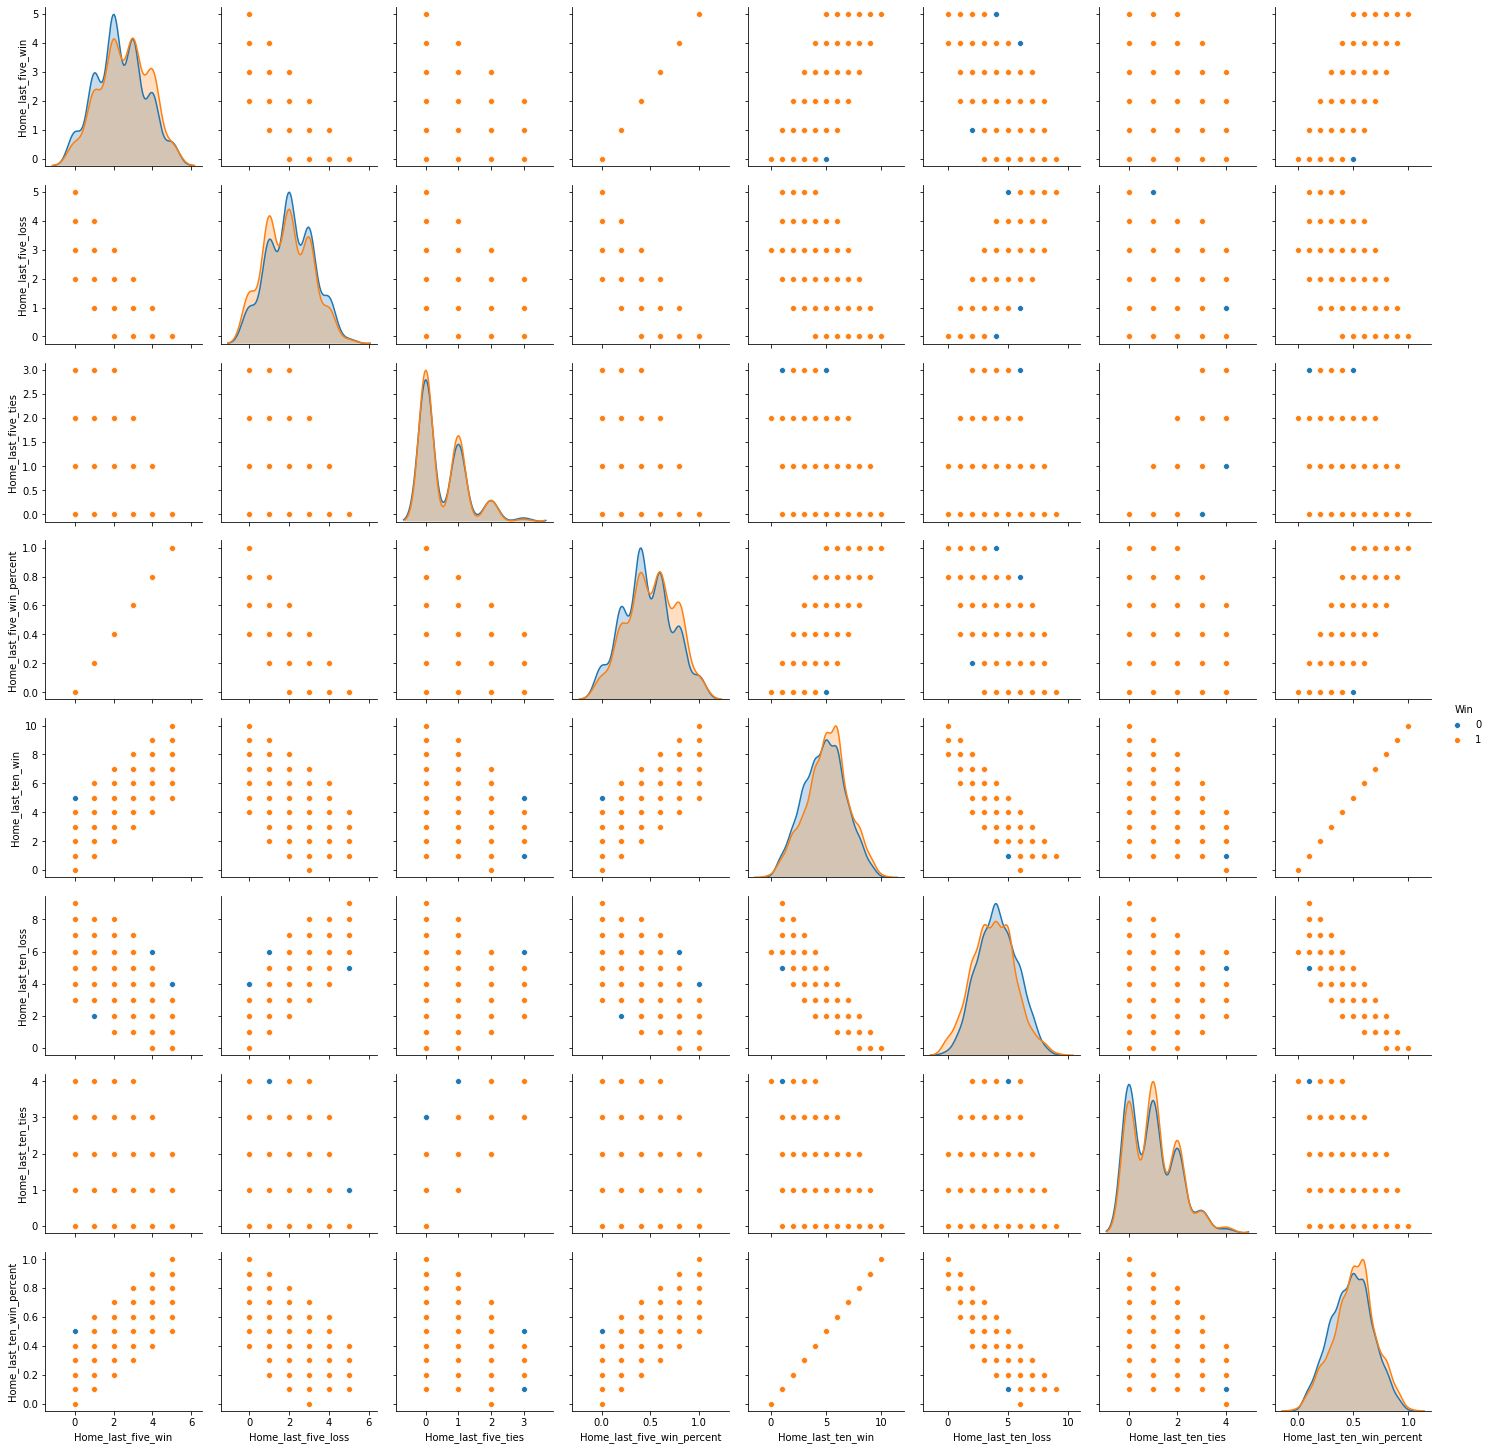

In [92]:
sns.pairplot(nhl_home_look, hue='Win')

In [93]:
nhl_away_attempt

,Away_Division,Away Team,Game Date,Home Team,Away_Goals,Home_Goals,Away_Result,Date_Time,totalpoints,Away_prev_pct,...,Away_last_ten_goals_for,Away_last_ten_goals_against,Away_last_five_win,Away_last_five_loss,Away_last_five_ties,Away_last_ten_win,Away_last_ten_loss,Away_last_ten_ties,Away_last_five_win_percent,Away_last_ten_win_percent
0,Atlantic,Tampa Bay,12/1/18,Florida,5,4,Win,2018-12-01,9,0.669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,Tampa Bay,12/3/18,New Jersey,5,1,Win,2018-12-03,6,0.674,...,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN,0.8,NaN
2,Atlantic,Tampa Bay,12/4/18,Detroit,6,5,Win,2018-12-04,11,0.686,...,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN,0.8,NaN
3,Atlantic,Tampa Bay,12/16/18,Winnipeg,4,5,OTL,2018-12-16,9,0.721,...,47.0,26.0,5.0,0.0,0.0,9.0,1.0,0.0,1.0,0.9
4,Atlantic,Tampa Bay,12/18/18,Vancouver,5,2,Win,2018-12-18,7,0.706,...,46.0,29.0,4.0,0.0,1.0,8.0,1.0,1.0,0.8,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,Pacific,Los Angeles,3/25/19,Calgary,3,0,Win,2019-03-25,3,0.365,...,26.0,31.0,2.0,3.0,0.0,4.0,6.0,0.0,0.4,0.4
950,Pacific,Los Angeles,3/26/19,Edmonton,4,8,Loss,2019-03-26,12,0.373,...,23.0,28.0,3.0,2.0,0.0,4.0,6.0,0.0,0.6,0.4
951,Pacific,Los Angeles,3/28/19,Vancouver,2,3,SOL,2019-03-28,5,0.368,...,26.0,33.0,3.0,2.0,0.0,4.0,6.0,0.0,0.6,0.4
952,Pacific,Los Angeles,4/2/19,Arizona,3,1,Win,2019-04-02,4,0.370,...,28.0,35.0,2.0,2.0,1.0,4.0,5.0,1.0,0.4,0.4


##### Saving the dataframes into two csv files to use the data in SQL to do more feature engineering and analysis

In [94]:
nhl_home_attempt.to_csv('NHL_home_teams_new.csv')

In [95]:
nhl_away_attempt.to_csv('NHL_away_teams_new.csv')

In [96]:
nhl_away_attempt.columns

Index(['Away_Division', 'Away Team', 'Game Date', 'Home Team', 'Away_Goals',
       'Home_Goals', 'Away_Result', 'Date_Time', 'totalpoints',
       'Away_prev_pct', 'Away_prev_wins', 'Away_prev_loss', 'Away_prev_Ties',
       'Away_prev_pct_five', 'Away_prev_wins_five', 'Away_prev_loss_five',
       'Away_prev_ties_five', 'Away_prev_pct_ten', 'Away_prev_wins_ten',
       'Away_prev_loss_ten', 'Away_prev_ties_ten', 'Away_last_five_goals_for',
       'Away_last_five_goals_against', 'Away_last_ten_goals_for',
       'Away_last_ten_goals_against', 'Away_last_five_win',
       'Away_last_five_loss', 'Away_last_five_ties', 'Away_last_ten_win',
       'Away_last_ten_loss', 'Away_last_ten_ties',
       'Away_last_five_win_percent', 'Away_last_ten_win_percent'],
      dtype='object')